In [4]:
import matplotlib.pyplot as pl
import numpy as np
import skope
%matplotlib inline

# Stellar Light Curves

Star objects can be initialized by calling <code>skope.Target()</code>. By default, <code>Target()</code> uses the motion vectors of the target <code>EPIC ID: 205998445</code>, a fairly standard C3 *K2* target. This can be changed with the <code>ID</code> parameter.  

The <code>GenerateLightCurve()</code> function takes a stellar magnitude and returns a full light curve (<code>fpix</code>), a 1-dimensional flux light curve (<code>flux</code>), and a light curve containing the error in each pixel (<code>ferr</code>).

In [5]:
star = skope.Target()
fpix, flux, ferr = star.GenerateLightCurve(12.)

100%|██████████| 1000/1000 [01:03<00:00, 15.83it/s]


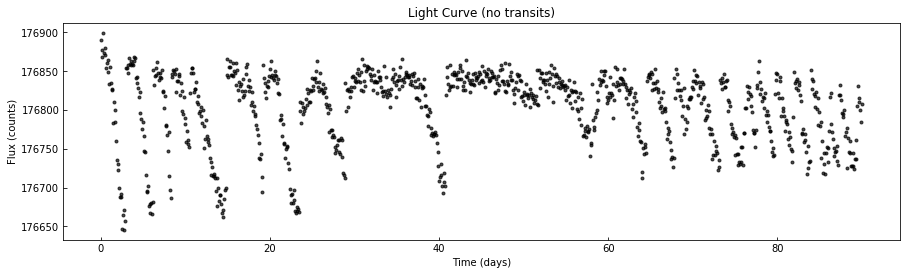

In [6]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t, flux,'k.', alpha=.7);
pl.title('Light Curve (no transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

# Transits

Now, add a transit to the light curve with the <code>AddTransit()</code> function. <code>AddTransit()</code> takes in a full light curve and returns the light curve with added transits and the 1-dimensional flux light curve with added transits.  

In [4]:
fpix_tr, flux_tr = star.AddTransit(fpix)

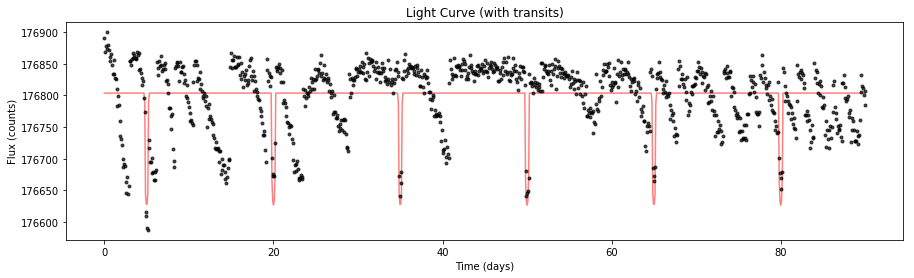

In [5]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t, star.trn*np.mean(flux),'r', alpha=.5);
pl.plot(star.t,flux_tr, 'k.', alpha=.7);
pl.title('Light Curve (with transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

The <code>Detrend()</code> function can be called with the light curve to remove the instrumental noise with second order PLD. <code>Detrend()</code> returns both the detrended and raw flux.

In [6]:
detrend, rawflux = star.Detrend(fpix_tr)

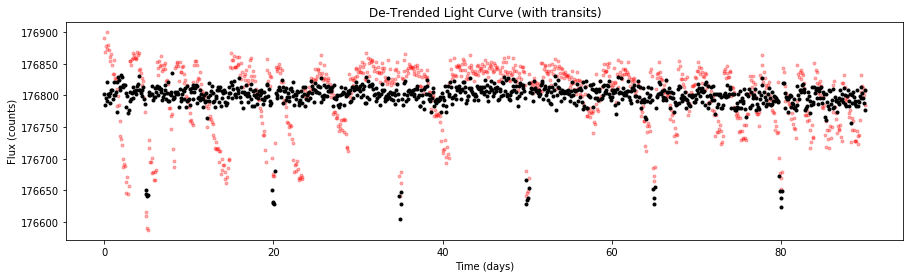

In [7]:
fig = pl.figure(figsize=(15,4))
pl.plot(star.t, rawflux, 'r.', alpha=.3);
pl.plot(star.t, detrend, 'k.');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');
pl.title('De-Trended Light Curve (with transits)');

# Variability

Stellar variability can be injected into a light curve in a similar way to injecting transits. To add simusoidal variability, call the <code>star.AddVariability()</code> function on a <code>fpix</code> light curve. <code>AddVariability()</code> takes amplitude (<code>var_amp</code>) and frequency (<code>freq</code>).

Alternatively, a custom variability array of length <code>star.ncadences</code> can be passed into <code>AddVariability</code> with the <code>custom_variability</code> parameter.

In [8]:
fpix_v, flux_v = star.AddVariability(fpix)

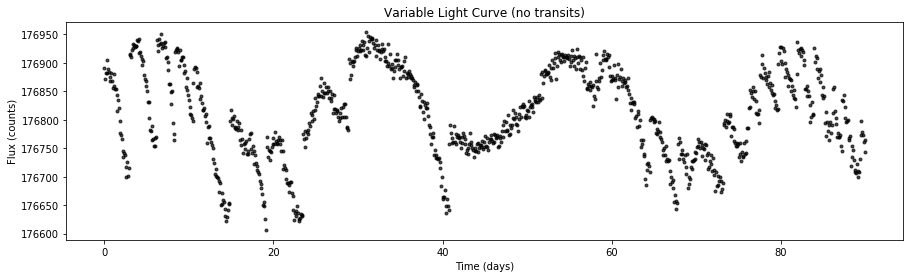

In [9]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t, flux_v, 'k.', alpha=.7);
pl.title('Variable Light Curve (no transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

In [10]:
detrend_v, rawflux_v = star.Detrend(fpix_v)

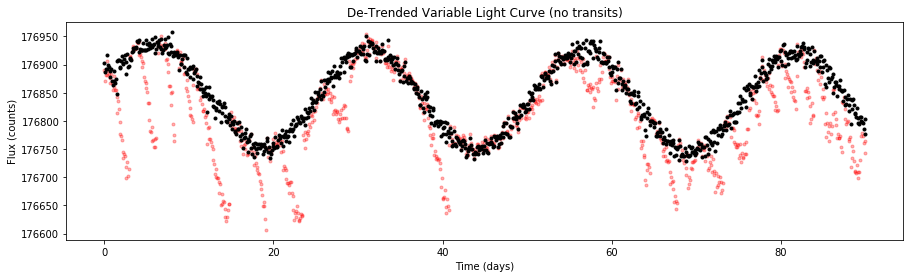

In [11]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t, rawflux_v, 'r.', alpha=.3);
pl.plot(star.t, detrend_v, 'k.');
pl.title('De-Trended Variable Light Curve (no transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

# High Roll

To create a light curve with increased spacecraft roll, the <code>roll</code> parameter (default to 1.0) can be changed in the <code>GenerateLightCurve()</code> function. Let's generate a light curve with 5.0x current spacecraft motion. To avoid flux loss off the edge of the aperture, the <code>apsize</code> parameter has been increased to 9 (from default 7).

In [12]:
star = skope.Target()
highroll_fpix, highroll_flux, highroll_ferr = star.GenerateLightCurve(12., roll=5., apsize=9)

100%|██████████| 1000/1000 [01:29<00:00, 11.15it/s]


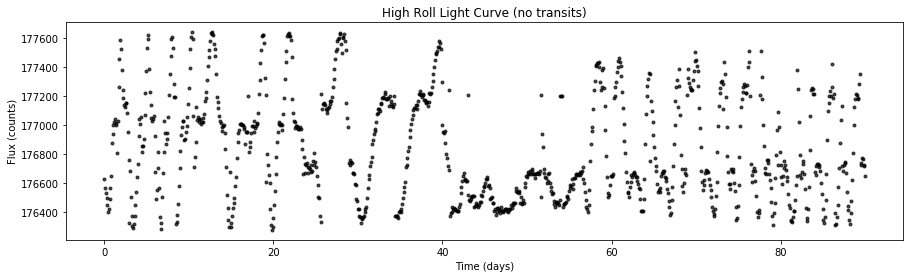

In [13]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t, highroll_flux, 'k.', alpha=.7);
pl.title('High Roll Light Curve (no transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

In [14]:
hr_fpix_tr, hr_flux_tr = star.AddTransit(highroll_fpix)

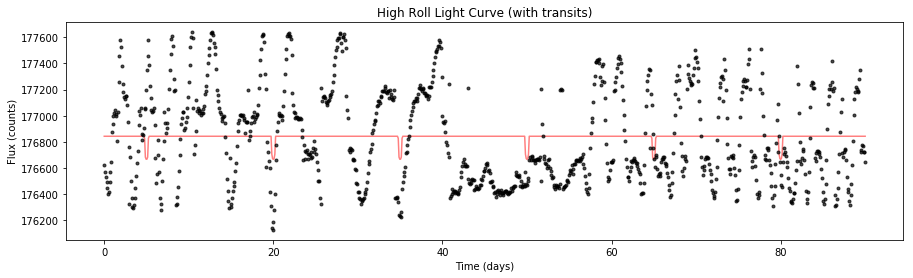

In [15]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t, star.trn*np.mean(highroll_flux), 'r', alpha=0.5);
pl.plot(star.t, hr_flux_tr, 'k.', alpha=.7);
pl.title('High Roll Light Curve (with transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

In [16]:
detrend_hr, rawflux_hr = star.Detrend(hr_fpix_tr)

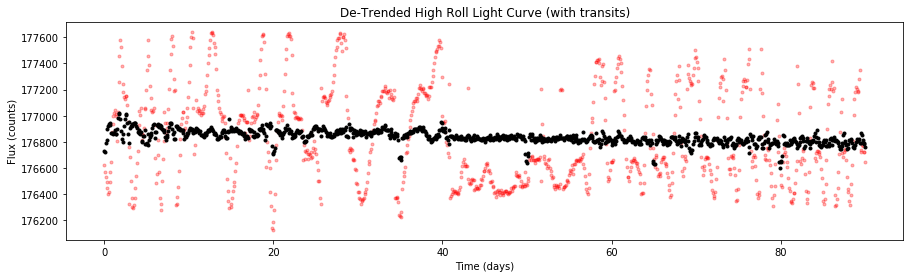

In [17]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t, rawflux_hr, 'r.', alpha=.3);
pl.plot(star.t, detrend_hr, 'k.');
pl.title('De-Trended High Roll Light Curve (with transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

# Default Target Parameters

Alternatively, a target can be initialized with both variability and transits with default parameters by calling <pre><code>skope.Target(transit=True, variable=True)</code></pre>

In [18]:
star = skope.Target(transit=True, variable=True)
fpix_d, flux_d, ferr_d = star.GenerateLightCurve(12.)

100%|██████████| 1000/1000 [00:46<00:00, 21.65it/s]


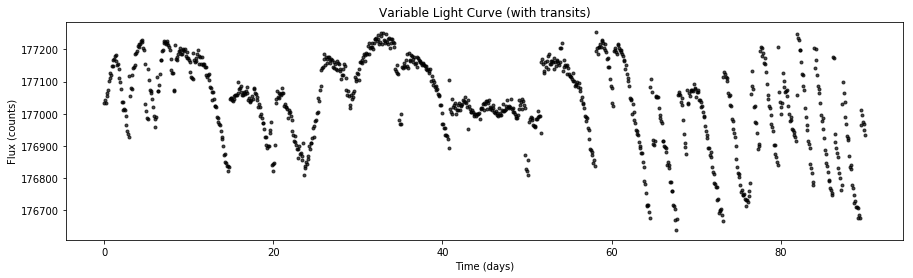

In [19]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t,flux_d,'k.', alpha=.7);
pl.title('Variable Light Curve (with transits)')
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

In [20]:
detrend_d, rawflux_d = star.Detrend(fpix_d)

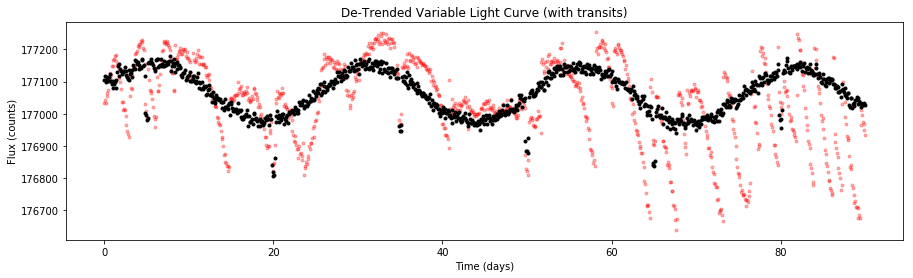

In [21]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t,rawflux_d,'r.',alpha=.3);
pl.plot(star.t,detrend_d,'k.');
pl.title('De-Trended Variable Light Curve (with transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

# Detector

The CCD detector (with given parameters, or default if no parameters given) can be displayed with the DisplayDetector( ) function.

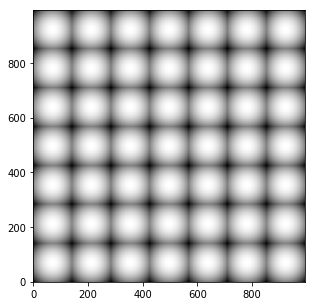

In [22]:
fig = pl.figure(figsize=(5,5))
det = star.DisplayDetector()

# Apertures

The <code>star.GenerateLightCurve()</code> function also takes a <code>background_level</code> parameter. By default, it is set to zero to simplify de-trending tests, but can be initialized to any positive value. When <code>background_level > 0</code>, it is necessary to define an aperture around the target to exclude extraneous background noise. This takes place in the <code>star.Aperture()</code> function, which identifies pixels containing light from the target star and creates a single weighted aperture to be used for the entire light curve. 

This is done automatically in the <code>star.Detrend()</code> function whenever <code>background_level > 0</code>, but the created aperture can be returned and displayed by calling the function on the <code>fpix</code> light curve.

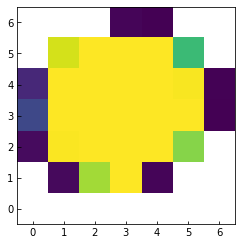

In [7]:
aperture = star.Aperture(fpix)
pl.imshow(aperture, origin='lower');

In [10]:
highroll_fpix, highroll_flux, highroll_ferr = star.GenerateLightCurve(12., roll=10., apsize=9, ncadences=100)

100%|██████████| 100/100 [00:10<00:00,  9.19it/s]


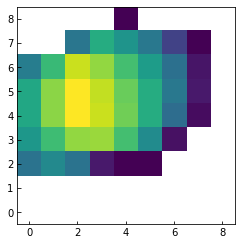

In [11]:
aperture = star.Aperture(highroll_fpix)
pl.imshow(aperture, origin='lower');